In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files


In [6]:
# Load the pre-trained Faster R-CNN model from TensorFlow Hub
model = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1")

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array."""
    return np.array(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

# Function to run object detection
def run_inference(model, image):
    image_tensor = tf.convert_to_tensor(image)
    image_tensor = image_tensor[tf.newaxis, ...]  # Add batch dimension
    detections = model(image_tensor)
    return detections


Saving object_detection.jpg to object_detection.jpg


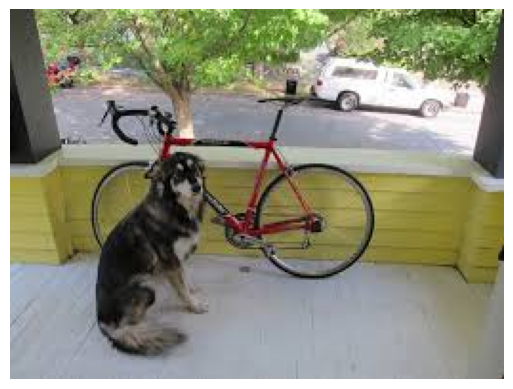

In [7]:
# Upload image
uploaded = files.upload()  # This will prompt you to upload an image
image_path = list(uploaded.keys())[0]  # Get the path of the uploaded image

# Load the uploaded image into numpy array
image_np = load_image_into_numpy_array(image_path)

# Display the image
plt.imshow(image_np)
plt.axis('off')
plt.show()


In [8]:
# Run object detection
detections = run_inference(model, image_np)

# Extract detection data
detection_boxes = detections["detection_boxes"].numpy()[0]
detection_classes = detections["detection_classes"].numpy()[0].astype(np.int32)
detection_scores = detections["detection_scores"].numpy()[0]


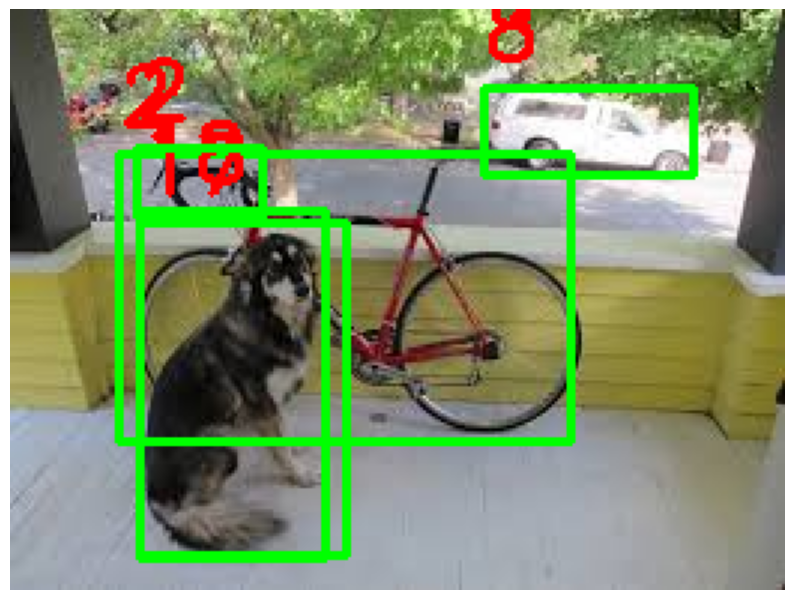

In [9]:
# Function to draw bounding boxes on the image
def draw_boxes(image_np, boxes, classes, scores, threshold=0.5):
    height, width, _ = image_np.shape
    for i in range(len(scores)):
        if scores[i] > threshold:  # Only consider detections above threshold
            box = boxes[i]
            y_min, x_min, y_max, x_max = box
            (left, right, top, bottom) = (x_min * width, x_max * width, y_min * height, y_max * height)

            # Draw the bounding box
            cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

            # Put a label (class ID)
            label = str(classes[i])
            cv2.putText(image_np, label, (int(left), int(top)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return image_np

# Draw bounding boxes on the image
image_with_boxes = draw_boxes(image_np.copy(), detection_boxes, detection_classes, detection_scores)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_boxes)
plt.axis('off')
plt.show()
